<a href="https://colab.research.google.com/github/ludovicolanni/neural-music-composer/blob/master/GatedRnnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up the TPU Environment for Fast Training

In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [ ]:
# initialize the TPU environment

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.51.198.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.51.198.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


In [ ]:
# define the TPU strategy

strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
# checking how many TPU devices we are working with

print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 8


# Building Gated RNN Models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# load the one-hot-encoded numpy arrays

x_train = np.load('/content/drive/My Drive/RNN_data/x_train.npy')
y_train = np.load('/content/drive/My Drive/RNN_data/y_train.npy')
x_test = np.load('/content/drive/My Drive/RNN_data/x_test.npy')
y_test = np.load('/content/drive/My Drive/RNN_data/y_test.npy')
x_validation = np.load('/content/drive/My Drive/RNN_data/x_validation.npy')
y_validation = np.load('/content/drive/My Drive/RNN_data/y_validation.npy')

In [ ]:
# convert numpy arrays into tensorflow datasets

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validation_dataset = tf.data.Dataset.from_tensor_slices((x_validation, y_validation))

In [ ]:
# batch the datasets

BATCH_SIZE_PER_REPLICA = 128
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

train_dataset = train_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Define Models

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
# let's define a function that builds a custom LSTM-based or GRU-based RNN

def build_RNN(seq_length, n_chars, layer_type='LSTM', n_rec_layers=1, rec_layer_depth=512):

  import tensorflow as tf
  from tensorflow.python.keras.layers import Input, LSTM, Dense, GRU

  source = Input(shape=(seq_length, n_chars,), name='Input')

  if layer_type=='LSTM':
    rec = LSTM(rec_layer_depth, name='LSTM')(source)

    if n_rec_layers==2:
      rec = LSTM(rec_layer_depth, name='LSTM')(rec)
    
      
  elif layer_type=='GRU':
    rec = GRU(rec_layer_depth, name='GRU')(source)

    if n_rec_layers==2:
      rec = GRU(rec_layer_depth, name='LSTM')(rec)
  
  output = Dense(n_chars, activation='softmax', name='Output')(rec)

  model = tf.keras.Model(inputs=source, outputs=output)

  print('Type of Recurrent Unit: ',layer_type)
  print('Number of Recurrent Blocks: ',n_rec_layers)
  print()
  print(model.summary())

  return model

## 1-layered LSTM based RNN

In [ ]:
# let's build the model and compile it within the TPU strategy scope

with strategy.scope():

  # build the model

  lstm_1 = build_RNN(512,22,'LSTM',1,512)   # 1-layered LSTM-based

  # let's define the optimizer of the model 

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)   # for TPU support

  # let's compile the model

  lstm_1.compile(loss='categorical_crossentropy', 
                optimizer=optimizer,
                metrics=['acc'])

Type of Recurrent Unit:  LSTM
Number of Recurrent Blocks:  1

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 512, 22)]         0         
_________________________________________________________________
LSTM (LSTM)                  (None, 512)               1095680   
_________________________________________________________________
Output (Dense)               (None, 22)                11286     
Total params: 1,106,966
Trainable params: 1,106,966
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# let's define the callbacks 

callbacks_list_lstm = [
                  tf.keras.callbacks.EarlyStopping(
                      monitor='acc',
                      patience=5,
                      ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath='/content/drive/My Drive/RNN_models/lstm_1_100.h5',
                      monitor='val_loss',
                      save_best_only=True,
                      ),
                  tf.keras.callbacks.ReduceLROnPlateau(
                      monitor='val_loss',
                      factor=0.1,
                      patience=2,
                      ),
                  tf.keras.callbacks.CSVLogger(
                      filename = '/content/drive/My Drive/RNN_models/log_lstm_1_100.csv', 
                      separator=',', 
                      append=False
                      ),
                  tf.keras.callbacks.TerminateOnNaN()
                  ]

In [ ]:
# let's train the model

from numpy.random import seed
seed(1)
tf.random.set_seed(2)

epochs = 100

history_lstm_1 = lstm_1.fit(train_dataset,
                            epochs=epochs,
                            callbacks=callbacks_list_lstm,
                            validation_data=validation_dataset)

Epoch 1/100
109/109 [==============================] - 17s 152ms/step - acc: 0.1230 - loss: 3.2191 - val_acc: 0.0456 - val_loss: 3.2508 - lr: 0.0100
Epoch 2/100
109/109 [==============================] - 14s 125ms/step - acc: 0.1310 - loss: 3.0117 - val_acc: 0.0896 - val_loss: 3.0818 - lr: 0.0100
Epoch 3/100
109/109 [==============================] - 14s 125ms/step - acc: 0.1843 - loss: 2.8266 - val_acc: 0.1310 - val_loss: 2.8341 - lr: 0.0100
Epoch 4/100
109/109 [==============================] - 14s 126ms/step - acc: 0.2225 - loss: 2.6816 - val_acc: 0.1985 - val_loss: 2.6612 - lr: 0.0100
Epoch 5/100
109/109 [==============================] - 14s 126ms/step - acc: 0.2530 - loss: 2.5507 - val_acc: 0.2075 - val_loss: 2.5976 - lr: 0.0100
Epoch 6/100
109/109 [==============================] - 14s 128ms/step - acc: 0.2700 - loss: 2.4615 - val_acc: 0.2412 - val_loss: 2.4854 - lr: 0.0100
Epoch 7/100
109/109 [==============================] - 14s 127ms/step - acc: 0.2864 - loss: 2.3951 - val_a

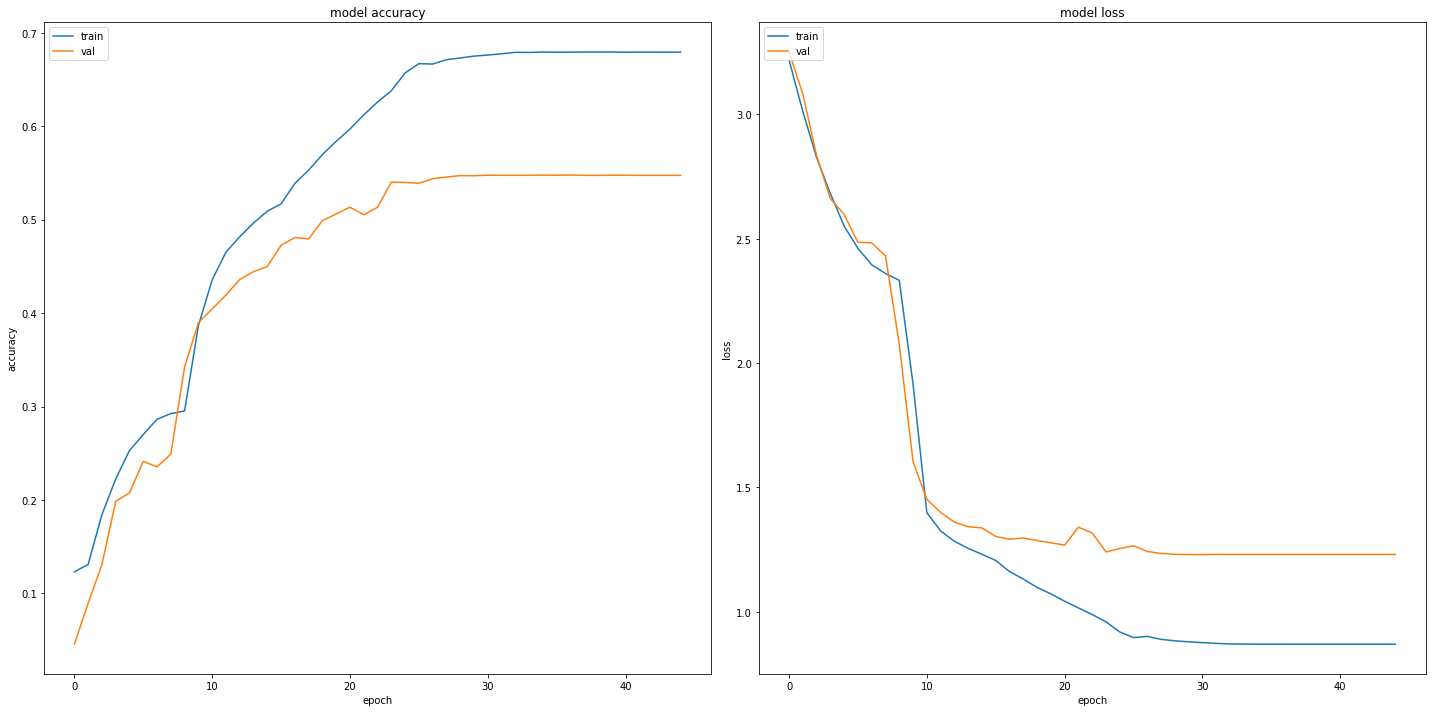

In [ ]:
# save the history of the model

import pickle 

with open('/content/drive/My Drive/RNN_models/history_lstm_1_100', 'wb') as f:
  pickle.dump(history_lstm_1.history, f)

# plot the history of the model

%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].plot(history_lstm_1.history['acc'])
axes[0].plot(history_lstm_1.history['val_acc'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'val'], loc='upper left')

axes[1].plot(history_lstm_1.history['loss'])
axes[1].plot(history_lstm_1.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'val'], loc='upper left')

fig.tight_layout()

In [ ]:
# let's evaluate the model on test data

test_loss, test_acc = lstm_1.evaluate(test_dataset)

print('test loss: {}, test Accuracy: {}'.format(test_loss, test_acc))

17/17 [==============================] - 2s 108ms/step - acc: 0.5257 - loss: 1.2765
test loss: 1.276498794555664, test Accuracy: 0.5256668329238892


## 1-layered GRU based RNN

In [ ]:
# let's build the model and compile it within the TPU strategy scope

with strategy.scope():

  # build the model

  gru_1 = build_RNN(512,22,'GRU',1,512)   # 1-layered GRU-based

  # let's define the optimizer of the model 

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)   # for TPU support

  # let's compile the model

  gru_1.compile(loss='categorical_crossentropy', 
                optimizer=optimizer,
                metrics=['acc'])

Type of Recurrent Unit:  GRU
Number of Recurrent Blocks:  1

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 512, 22)]         0         
_________________________________________________________________
GRU (GRU)                    (None, 512)               823296    
_________________________________________________________________
Output (Dense)               (None, 22)                11286     
Total params: 834,582
Trainable params: 834,582
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# let's define the callbacks 

callbacks_list_gru = [
                  tf.keras.callbacks.EarlyStopping(
                      monitor='acc',
                      patience=5,
                      ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath='/content/drive/My Drive/RNN_models/gru_1_100.h5',
                      monitor='val_loss',
                      save_best_only=True,
                      ),
                  tf.keras.callbacks.ReduceLROnPlateau(
                      monitor='val_loss',
                      factor=0.1,
                      patience=2,
                      ),
                  tf.keras.callbacks.CSVLogger(
                      filename = '/content/drive/My Drive/RNN_models/log_gru_1_100.csv', 
                      separator=',', 
                      append=False
                      ),
                  tf.keras.callbacks.TerminateOnNaN()
                  ]

In [ ]:
# let's train the model

from numpy.random import seed
seed(1)
tf.random.set_seed(2)

epochs = 100

history_gru_1 = gru_1.fit(train_dataset,
                            epochs=epochs,
                            callbacks=callbacks_list_gru,
                            validation_data=validation_dataset)

Epoch 1/100
109/109 [==============================] - 16s 145ms/step - acc: 0.3312 - loss: 2.1896 - val_acc: 0.3633 - val_loss: 1.5772 - lr: 0.0010
Epoch 2/100
109/109 [==============================] - 13s 123ms/step - acc: 0.4451 - loss: 1.4058 - val_acc: 0.4041 - val_loss: 1.4479 - lr: 0.0010
Epoch 3/100
109/109 [==============================] - 13s 123ms/step - acc: 0.4688 - loss: 1.3268 - val_acc: 0.4208 - val_loss: 1.4068 - lr: 0.0010
Epoch 4/100
109/109 [==============================] - 13s 119ms/step - acc: 0.4821 - loss: 1.2863 - val_acc: 0.4169 - val_loss: 1.4439 - lr: 0.0010
Epoch 5/100
109/109 [==============================] - 14s 125ms/step - acc: 0.4967 - loss: 1.2551 - val_acc: 0.4489 - val_loss: 1.3415 - lr: 0.0010
Epoch 6/100
109/109 [==============================] - 13s 124ms/step - acc: 0.5056 - loss: 1.2308 - val_acc: 0.4543 - val_loss: 1.3248 - lr: 0.0010
Epoch 7/100
109/109 [==============================] - 14s 124ms/step - acc: 0.5188 - loss: 1.2064 - val_a

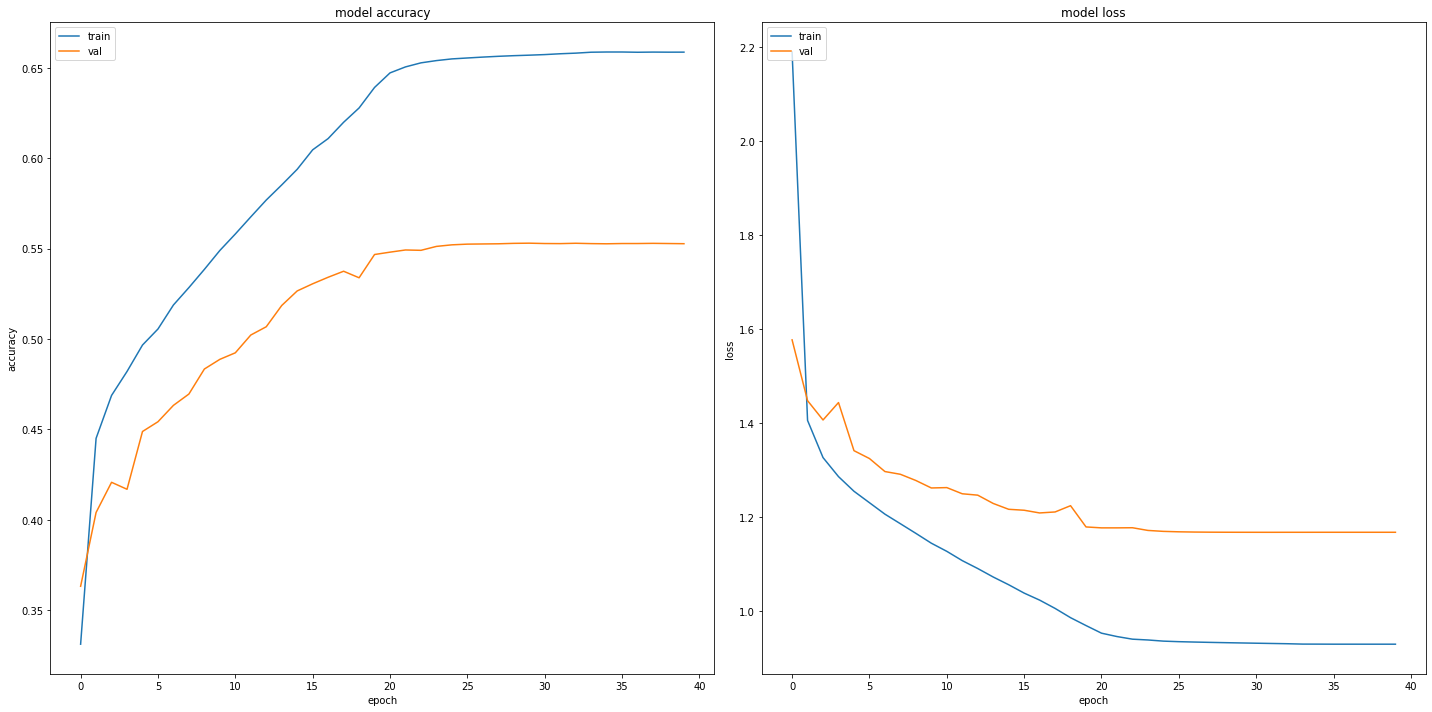

In [ ]:
# save the history of the model

import pickle 

with open('/content/drive/My Drive/RNN_models/history_gru_1_100', 'wb') as f:
  pickle.dump(history_gru_1.history, f)

# plot the history of the model

%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].plot(history_gru_1.history['acc'])
axes[0].plot(history_gru_1.history['val_acc'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'val'], loc='upper left')

axes[1].plot(history_gru_1.history['loss'])
axes[1].plot(history_gru_1.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'val'], loc='upper left')

fig.tight_layout()

In [ ]:
# let's evaluate the model on test data

test_loss, test_acc = gru_1.evaluate(test_dataset)

print('test loss: {}, test Accuracy: {}'.format(test_loss, test_acc))

17/17 [==============================] - 2s 109ms/step - acc: 0.5425 - loss: 1.2059
test loss: 1.2058913707733154, test Accuracy: 0.5424900650978088


**WOWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW, SO FAST USING TPU WITH 8 CORES !!!!!!!!!!!!!!!!!!!!!!!!!!**
